# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [4]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [5]:
%pip install --upgrade plotly

### Import Statements

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [47]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [48]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [49]:
print(df_data.shape)
df_data.head()

(4324, 9)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [50]:
print(f'Any df_data NaN values? {df_data.values.any()}')
print(f'Any df_data duplicates? {df_data.duplicated().values.any()}')

Any df_data NaN values? 1
Any df_data duplicates? False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [51]:
print(df_data.isna().sum())
df_data.loc[df_data['Price'].isna()]

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [52]:
df_data.info()
clean_data = df_data.drop(["Unnamed: 0.1", "Unnamed: 0"],  axis='columns')
clean_data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Descriptive Statistics

In [53]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [54]:
clean_data.Price = pd.to_numeric(clean_data.Price, errors='coerce')
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           949 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [55]:
number_mission_by_organisation = clean_data.value_counts('Organisation')[:20]
number_mission_by_organisation.sort_values(inplace=True)
number_mission_by_organisation

Organisation
Kosmotras             22
ISAS                  30
Sea Launch            36
ILS                   46
Roscosmos             55
ISRO                  76
Lockheed              79
Northrop              83
MHI                   84
SpaceX               100
Martin Marietta      114
Boeing               136
ULA                  140
US Air Force         161
VKS RF               201
NASA                 203
CASC                 251
General Dynamics     251
Arianespace          279
RVSN USSR           1777
Name: count, dtype: int64

In [56]:
h_bar = px.bar(number_mission_by_organisation,
               orientation='h',
               color = number_mission_by_organisation.values,
               color_continuous_scale='Viridis',
               title='Top 20 Organisation by Number of mission')

h_bar.update_layout(xaxis_title='Number of mission', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [57]:
rocket_status = clean_data.value_counts('Rocket_Status')
rocket_status

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [58]:
fig = px.pie(labels=rocket_status.index, 
             values=rocket_status.values,
             title="Active_Rockets vs. Retired_Rockets",
             names=rocket_status.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [59]:
mission_status = clean_data.value_counts('Mission_Status')
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [60]:
fig = px.pie(labels=mission_status.index, 
             values=mission_status.values,
             title="Active_Rockets vs. Retired_Rockets",
             names=mission_status.index,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [61]:
x = clean_data.Price
x.dropna(inplace=True)
x.value_counts()

Price
450.00    136
200.00     75
40.00      55
62.00      41
30.80      38
109.00     37
50.00      34
64.68      34
29.75      33
90.00      32
41.80      31
48.50      26
29.15      25
31.00      22
29.00      22
59.00      22
69.70      17
65.00      16
21.00      16
35.00      16
37.00      15
56.50      15
164.00     15
7.50       14
47.00      13
25.00      12
350.00     11
153.00     11
45.00      10
5.30        9
112.50      9
123.00      8
80.00       7
85.00       7
120.00      7
145.00      7
115.00      6
7.00        5
59.50       5
46.00       5
136.60      4
63.23       4
140.00      3
133.00      3
190.00      3
130.00      3
39.00       2
135.00      2
55.00       1
15.00       1
20.14       1
20.00       1
28.30       1
12.00       1
Name: count, dtype: int64

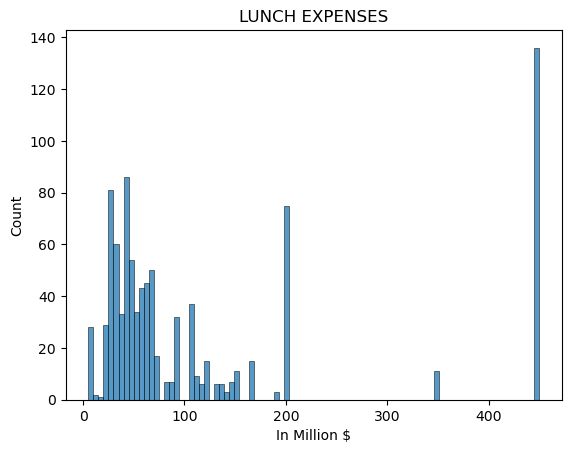

In [62]:

sns.histplot(data=x,
             bins=90)
plt.xlabel('In Million $')
plt.title('LUNCH EXPENSES')
plt.show()

hist = px.histogram(clean_data,
                    x=clean_data.Price,
                   nbins=70,
                    )

hist.update_layout(xaxis_title='LUNCH EXPENSES In Million $',
                   yaxis_title='Count',
                  coloraxis_showscale=False)

hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [63]:
country = clean_data['Location'].str.split(",")
# make country column()
con = []
for i in country.values:
    con.append(i[-1])


df_ = pd.DataFrame(con)
clean_data['country'] = df_[0]
clean_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [64]:
# cleaning data fix names make iso column
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Russia", " Russian Federation")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" New Mexico", " USA")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Yellow Sea", " China")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Shahrud Missile Test Site", " Iran")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Pacific Missile Range Facility", " USA")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Barents Sea", " Russian Federation")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Gran Canaria", " USA")

clean_data['country'] = clean_data['country'].astype(str).str.replace(" North Korea", " Korea, Democratic People's Republic of")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" South Korea", " Korea, Republic of")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Iran", " Iran, Islamic Republic of")
clean_data['country'] = clean_data['country'].astype(str).str.replace(" Pacific Ocean", " United States Minor Outlying Islands")
clean_data['country'].value_counts()

# delete " " space from country
clean_data['country'] = clean_data['country'].astype(str).str.replace(" ", "", 1)

# make iso code column
iso_map=[]
for v in clean_data['country']:
    for c in countries:
       if v == c[0] or v == c[2]:
            iso_map.append(c[2])
            
df_ = pd.DataFrame(iso_map)
df_.value_counts()
clean_data['iso_map'] = df_[0]    
clean_data
 

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso_map
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


# Use a Choropleth Map to Show the Number of Failures by Country


In [65]:
clean_data['number'] = clean_data['country']
df_countries = clean_data.groupby(['country', 'iso_map'], 
                               as_index=False).agg({'number': pd.Series.count})
del clean_data['number']
df_countries.sort_values('number', ascending=False)

,country,iso_map,number
13,Russian Federation,RUS,1398
14,USA,USA,1351
8,Kazakhstan,KAZ,701
3,France,FRA,303
2,China,CHN,269
7,Japan,JPN,126
4,India,IND,76
15,United States Minor Outlying Islands,UMI,36
5,"Iran, Islamic Republic of",IRN,14
12,New Zealand,NZL,13


In [66]:
world_map = px.choropleth(df_countries,
                          locations="iso_map",
                          color="number", 
                          hover_name="country",
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()
        

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [67]:
clean_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso_map
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [68]:
clean_data['Status'] = clean_data['Mission_Status']

country_org_mission = clean_data.groupby(by=['country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg({'Status': pd.Series.count})
del clean_data['Status']
country_org_mission = country_org_mission.sort_values('Status', ascending=False)
country_org_mission

,country,Organisation,Mission_Status,Status
81,Russian Federation,RVSN USSR,Success,1119
58,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
103,USA,General Dynamics,Success,203
...,...,...,...,...
91,USA,AMBA,Partial Failure,1
20,France,Arm??e de l'Air,Partial Failure,1
97,USA,Douglas,Success,1
98,USA,EER,Failure,1


In [69]:
burst = px.sunburst(country_org_mission, 
                    path=['country', 'Organisation', 'Mission_Status'], 
                    values='Status',
                    title='Chart of the countries, organisations, and mission status',
                    width=700 ,
                    height=700 ,
                   )

burst.update_layout(xaxis_title='Mission_Status', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [70]:
clean_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso_map
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [71]:
total_expense_org = clean_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.count})
total_expense_org.sort_values('Price', ascending=False, inplace=True)
x = total_expense_org[:24]
x

,Organisation,Price
7,CASC,158
35,NASA,136
46,SpaceX,99
48,ULA,98
3,Arianespace,96
36,Northrop,83
23,ISRO,67
32,MHI,37
52,VKS RF,33
49,US Air Force,26


In [72]:
h_bar = px.bar(x,
               color = 'Organisation',
              x='Organisation',
               y='Price',
               color_continuous_scale='Viridis',
               title='Total Amount of Money Spent by Organisation')

h_bar.update_layout(xaxis_title='Organisation', 
                    yaxis_title='Million $',
                    coloraxis_showscale=False)
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [73]:
expense_per_Launch = clean_data.groupby(['Price', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
expense_per_Launch.sort_values('Price', ascending=False, inplace=True)
expense_per_Launch['Amount_of_Money_Spent_by_Organisation_per_Launch'] = expense_per_Launch.Price / expense_per_Launch.Mission_Status
expense_per_Launch

,Price,Organisation,Mission_Status,Amount_of_Money_Spent_by_Organisation_per_Launch
73,450.00,NASA,136,3.31
72,350.00,ULA,10,35.00
71,350.00,Boeing,1,350.00
70,200.00,Arianespace,75,2.67
69,190.00,Arianespace,3,63.33
...,...,...,...,...
4,12.00,Virgin Orbit,1,12.00
2,7.50,CASC,1,7.50
3,7.50,Rocket Lab,13,0.58
1,7.00,SpaceX,5,1.40


In [74]:
expense_per_Launch.sort_values('Amount_of_Money_Spent_by_Organisation_per_Launch', ascending=False)

,Price,Organisation,Mission_Status,Amount_of_Money_Spent_by_Organisation_per_Launch
71,350.00,Boeing,1,350.00
65,153.00,ILS,1,153.00
58,130.00,ILS,1,130.00
54,115.00,ILS,1,115.00
48,90.00,JAXA,1,90.00
...,...,...,...,...
13,29.75,CASC,33,0.90
14,30.80,CASC,38,0.81
23,40.00,Northrop,55,0.73
0,5.30,CASC,9,0.59


# Chart the Number of Launches per Year

In [77]:
by_year = clean_data.groupby(['Date', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
by_year['year'] = by_year['Date'].replace("UTC", "")
year = []
for y in by_year['year']:
    y = y.split()[3]
    year.append(y)
    
df_ = pd.DataFrame(year)
df_.value_counts()
by_year['year'] = df_[0]    
by_year

,Date,Organisation,Mission_Status,year
0,"Fri Apr 01, 1960 11:40 UTC",US Air Force,1,1960
1,"Fri Apr 02, 1971 08:20 UTC",RVSN USSR,1,1971
2,"Fri Apr 02, 1999 22:03 UTC",Arianespace,1,1999
3,"Fri Apr 02, 2010 04:04 UTC",Roscosmos,1,2010
4,"Fri Apr 03, 1970 08:30 UTC",RVSN USSR,1,1970
...,...,...,...,...
4315,"Wed Sep 28, 1983 07:59 UTC",RVSN USSR,1,1983
4316,"Wed Sep 29, 1971 11:30 UTC",RVSN USSR,1,1971
4317,"Wed Sep 29, 1976 07:04 UTC",RVSN USSR,1,1976
4318,"Wed Sep 30, 1981 08:00 UTC",RVSN USSR,1,1981


In [78]:
per_year = by_year.groupby('year', as_index=False).agg({'Mission_Status': pd.Series.count})
per_year
fig = px.line(per_year, x="year", y="Mission_Status", title='Launches per Year')
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [79]:
by_month = clean_data.groupby(['Date', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
by_month['month'] = by_year['Date'].str.replace("UTC", "")
by_month['month'] = by_month['month'].str.replace(",", "")
  
by_month['month'] = pd.to_datetime(by_month['month'], errors='coerce')

by_month['month'] = by_month['month'].dt.strftime('%Y-%m')
by_month['month'] = pd.to_datetime(by_month['month'])
by_month

# visualize 
per_month = by_month.groupby('month', as_index=False).agg({'Mission_Status': pd.Series.count})
per_month.sort_values(by=['month'])
per_month
fig = px.line(per_month, x="month", y="Mission_Status", title='Month-on-Month')
fig.show()

In [80]:
#rolling 6 months
roll_df = per_month[['Mission_Status']].rolling(window=6).mean()

fig = px.line(x=per_month['month'], y=roll_df['Mission_Status'], title='Month-on-Month')
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [81]:
best_month = by_month
best_month['month'] = best_month['month'].dt.month_name(locale = 'English') 
mon = best_month.value_counts('month')
best_month

,Date,Organisation,Mission_Status,month
0,"Fri Apr 01, 1960 11:40 UTC",US Air Force,1,April
1,"Fri Apr 02, 1971 08:20 UTC",RVSN USSR,1,April
2,"Fri Apr 02, 1999 22:03 UTC",Arianespace,1,April
3,"Fri Apr 02, 2010 04:04 UTC",Roscosmos,1,April
4,"Fri Apr 03, 1970 08:30 UTC",RVSN USSR,1,April
...,...,...,...,...
4315,"Wed Sep 28, 1983 07:59 UTC",RVSN USSR,1,September
4316,"Wed Sep 29, 1971 11:30 UTC",RVSN USSR,1,September
4317,"Wed Sep 29, 1976 07:04 UTC",RVSN USSR,1,September
4318,"Wed Sep 30, 1981 08:00 UTC",RVSN USSR,1,September


In [82]:
bar = px.bar(mon,
               color = mon.index,
              x=mon.index,
               y=mon.values,
               color_continuous_scale='Viridis',
               title='Most popular and least popular for launches')

bar.update_layout(xaxis_title='Month', 
                    yaxis_title='Lunch Number',
                    coloraxis_showscale=False)
bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

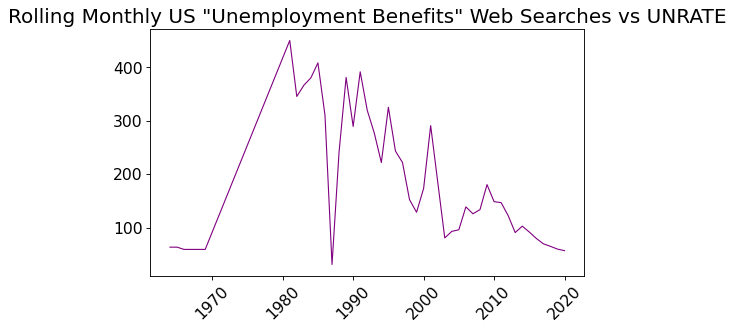

In [83]:
price_over_time = clean_data.groupby(['Date', 'Price', 'Mission_Status'], as_index=False).agg({'Mission_Status': pd.Series.count})


price_over_time['date'] = pd.to_datetime(price_over_time['Date'],format='mixed', dayfirst=True, utc=True)
price_over_time['date'] = price_over_time['date'].dt.year
price_over_time.sort_values('date', inplace=True)
price_over_time

price_over = price_over_time.groupby(['date'], as_index=False).agg({'Price': pd.Series.mean})
price_over

plt.figure(figsize=(7,4), dpi=80)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.plot(price_over.date, price_over.Price, 'purple', linewidth=1, )

plt.show()

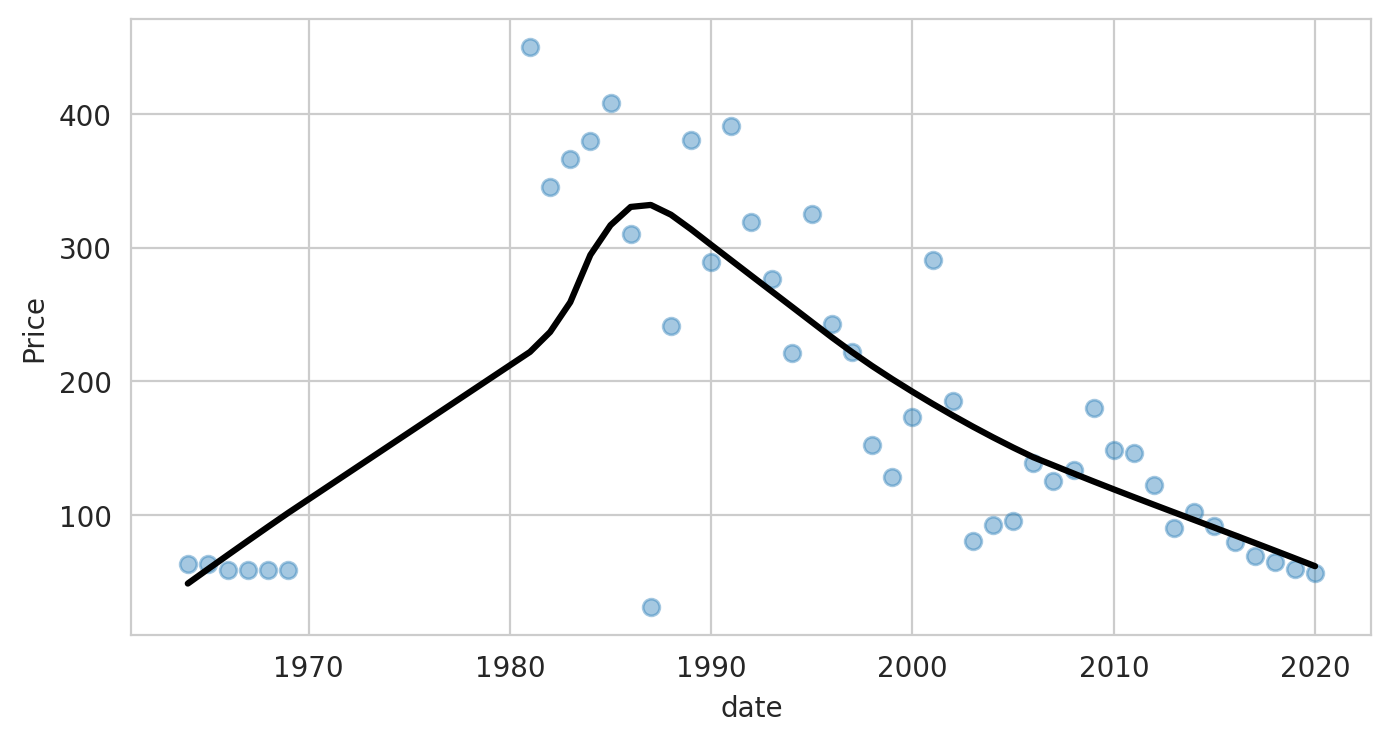

In [84]:
# fig = px.line(price_over, x="date", y="Price", title='Average price of rocket launches over time')
# fig.show()

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=price_over,
                x="date",
                y="Price",
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [85]:
top_10_df = clean_data
top_10_df['Date'] = pd.to_datetime(top_10_df['Date'],format='mixed', dayfirst=True, utc=True)
Top_10_org = top_10_df.groupby(['Date', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})

Top_10_org['Date'] = Top_10_org['Date'].dt.year
Top_10_org.sort_values('Date', inplace=True)
Top_10_org

Top_10 = Top_10_org.groupby(['Date', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
top_10 = Top_10_org.sort_values(['Mission_Status'],ascending=False)
Top_10



,Date,Organisation,Mission_Status
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [86]:
Top = Top_10_org.groupby(['Organisation']).agg({'Mission_Status': pd.Series.count})
Top.sort_values('Mission_Status', ascending=False, inplace=True)
Top = Top[:10]
Top

top_org = Top_10[Top_10['Organisation'].isin(Top.index)]
top_org

,Date,Organisation,Mission_Status
0,1957,RVSN USSR,2
3,1958,NASA,2
4,1958,RVSN USSR,5
5,1958,US Air Force,2
7,1959,General Dynamics,1
...,...,...,...
646,2019,VKS RF,8
648,2020,Arianespace,4
649,2020,CASC,19
660,2020,ULA,4


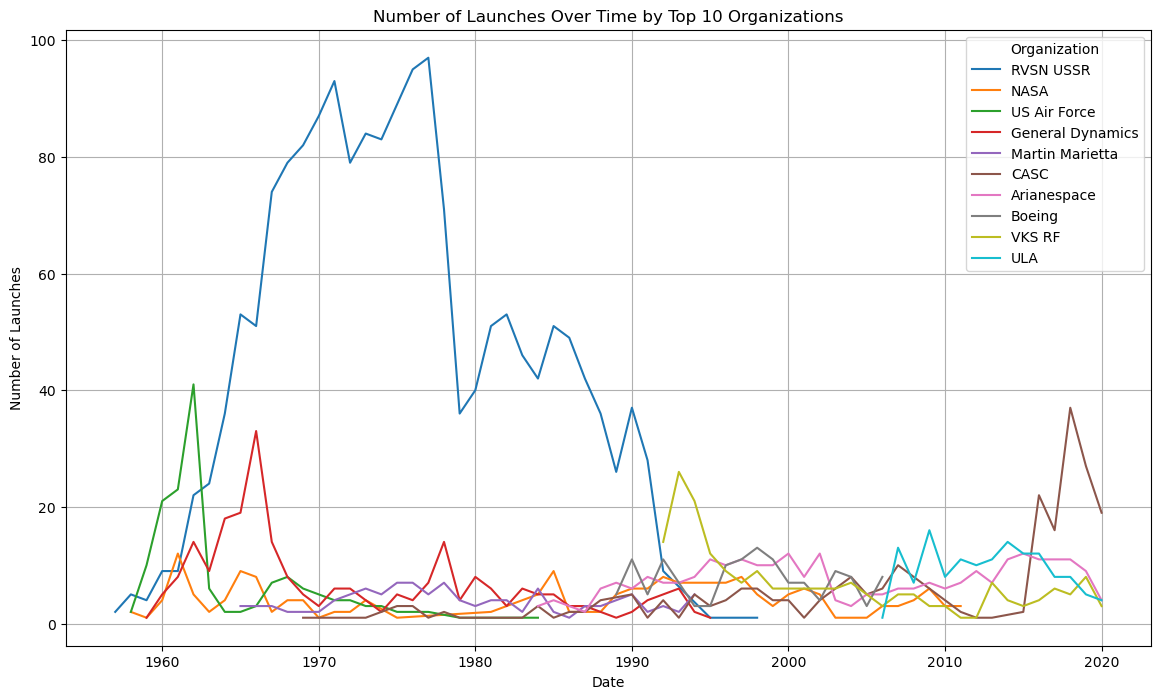

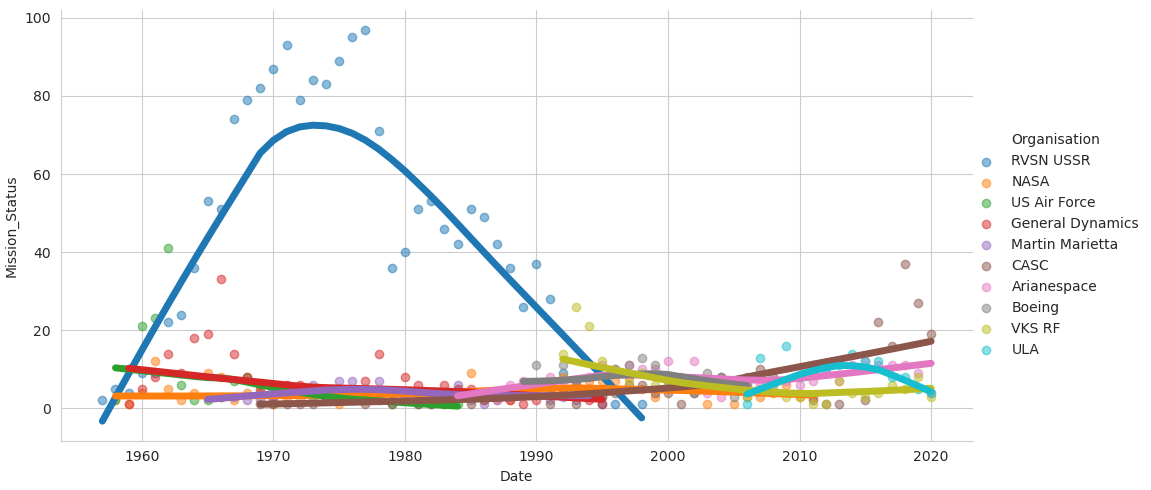

In [87]:
top_org
fig = px.line(top_org, x='Date', y='Mission_Status',color='Organisation', title='Number of Launches Over Time by Top 10 Organizations')
fig.show()


plt.figure(figsize=(14, 8))
sns.lineplot(data=top_org, x='Date', y='Mission_Status', hue='Organisation')

# Customize the plot
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.legend(title='Organization')
plt.grid(True)

# Show the plot
plt.show()

with sns.axes_style("whitegrid"):
    sns.lmplot(data=top_org,
               x='Date',
               y='Mission_Status',
               hue='Organisation',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [88]:
# clean_data = clean_data[pd.to_datetime(price_over_time['Date'],format='mixed', dayfirst=True, utc=True)]
cold_war = clean_data[clean_data['Date'].dt.year < 1992]
cold_war = cold_war.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})

cold_war_con = ['Russian Federation', 'USA', 'Kazakhstan']
cold_war = cold_war[cold_war['country'].isin(cold_war_con)]

cold_war['country'] = cold_war['country'].astype(str).str.replace("Kazakhstan", "Russian Federation")
cold_war['year'] = cold_war['Date'].dt.year

cold_war = cold_war.groupby(['year', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})
cold_war

,year,country,Mission_Status
0,1957,Russian Federation,2
1,1957,USA,1
2,1958,Russian Federation,5
3,1958,USA,23
4,1959,Russian Federation,4
...,...,...,...
65,1989,USA,16
66,1990,Russian Federation,37
67,1990,USA,26
68,1991,Russian Federation,29


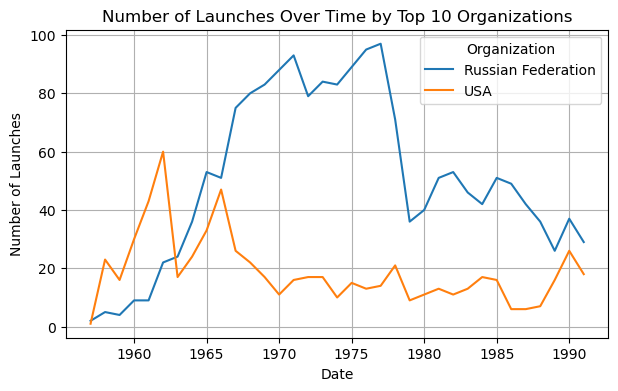

In [89]:
top_org
fig = px.line(cold_war, x='year', y='Mission_Status',color='country', title='Number of Launches USA vs USSR')
fig.show()


plt.figure(figsize=(7, 4))
sns.lineplot(data=cold_war, x='year', y='Mission_Status', hue='country')

# Customize the plot
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.legend(title='Organization')
plt.grid(True)

# Show the plot
plt.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [90]:
cold_war = clean_data[clean_data['Date'].dt.year < 1992]
cold_war = cold_war.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})

cold_war_con = ['Russian Federation', 'USA', 'Kazakhstan']
cold_war = cold_war[cold_war['country'].isin(cold_war_con)]

cold_war['country'] = cold_war['country'].astype(str).str.replace("Kazakhstan", "Russian Federation")
cold_war['year'] = cold_war['Date'].dt.year

cold_war = cold_war.groupby(['year', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})
cold_war

,year,country,Mission_Status
0,1957,Russian Federation,2
1,1957,USA,1
2,1958,Russian Federation,5
3,1958,USA,23
4,1959,Russian Federation,4
...,...,...,...
65,1989,USA,16
66,1990,Russian Federation,37
67,1990,USA,26
68,1991,Russian Federation,29


In [91]:
fig = px.pie(labels=cold_war.country, 
             values=cold_war.Mission_Status,
             title="Total number of launches USSR VS USA",
             names=cold_war.country,
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='label+value+percent')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [92]:
cold_war

,year,country,Mission_Status
0,1957,Russian Federation,2
1,1957,USA,1
2,1958,Russian Federation,5
3,1958,USA,23
4,1959,Russian Federation,4
...,...,...,...
65,1989,USA,16
66,1990,Russian Federation,37
67,1990,USA,26
68,1991,Russian Federation,29


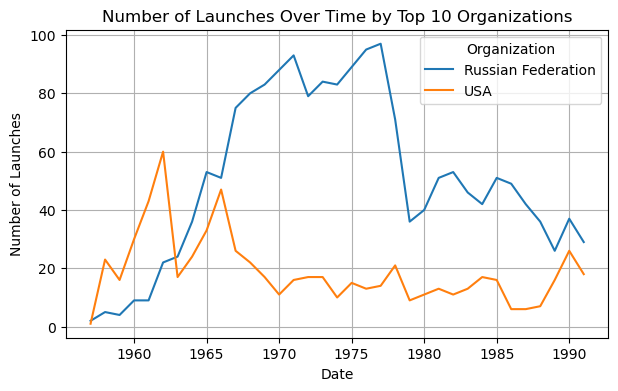

In [93]:
top_org
fig = px.line(cold_war, x='year', y='Mission_Status',color='country', title='Number of Launches USA vs USSR')
fig.show()


plt.figure(figsize=(7, 4))
sns.lineplot(data=cold_war, x='year', y='Mission_Status', hue='country')

# Customize the plot
plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.legend(title='Organization')
plt.grid(True)

# Show the plot
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [94]:
failure_mission = clean_data[clean_data['Date'].dt.year < 1992]
failure_mission = failure_mission.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.sum})
failure_mission['year'] = failure_mission['Date'].dt.year

cold_war_con = ['Russian Federation', 'USA', 'Kazakhstan']
failure_mission = failure_mission[failure_mission['country'].isin(cold_war_con)]
failure_mission['country'] = failure_mission['country'].astype(str).str.replace("Kazakhstan", "Russian Federation")
failure_mission['year'] = failure_mission['Date'].dt.year

failure_mission_year = failure_mission[failure_mission['Mission_Status'] == 'Failure']
failure_mission_year = failure_mission_year.groupby(['year', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})
failure_mission_year

,year,country,Mission_Status
0,1957,USA,1
1,1958,Russian Federation,4
2,1958,USA,16
3,1959,Russian Federation,1
4,1959,USA,8
5,1960,Russian Federation,6
6,1960,USA,14
7,1961,Russian Federation,4
8,1961,USA,13
9,1962,Russian Federation,7


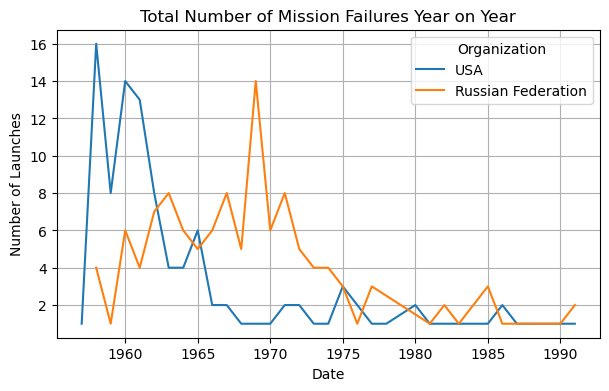

In [95]:
top_org
fig = px.line(failure_mission_year, x='year', y='Mission_Status',color='country', title='Total Number of Mission Failures Year on Year')
fig.show()


plt.figure(figsize=(7, 4))
sns.lineplot(data=failure_mission_year, x='year', y='Mission_Status', hue='country')

# Customize the plot
plt.title('Total Number of Mission Failures Year on Year')
plt.xlabel('Date')
plt.ylabel('Number of Launches')
plt.legend(title='Organization')
plt.grid(True)

# Show the plot
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [96]:
failure_Percentage = failure_mission.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.sum})

failure_Percentage['failure'] = failure_Percentage.Mission_Status.apply(lambda x: 1 if x == 'Failure' else 0)
failure_Percentage['year'] = failure_Percentage['Date'].dt.year
yearly_data = failure_Percentage.groupby('year').agg({'Mission_Status': 'count', 'failure': 'sum'}).reset_index()
yearly_data['fail_percent'] = yearly_data['failure'] / yearly_data['Mission_Status'] * 100
yearly_data

,year,Mission_Status,failure,fail_percent
0,1957,3,1,33.33
1,1958,28,20,71.43
2,1959,20,9,45.00
3,1960,39,20,51.28
4,1961,52,17,32.69
5,1962,82,15,18.29
6,1963,41,12,29.27
7,1964,60,10,16.67
8,1965,86,11,12.79
9,1966,98,8,8.16


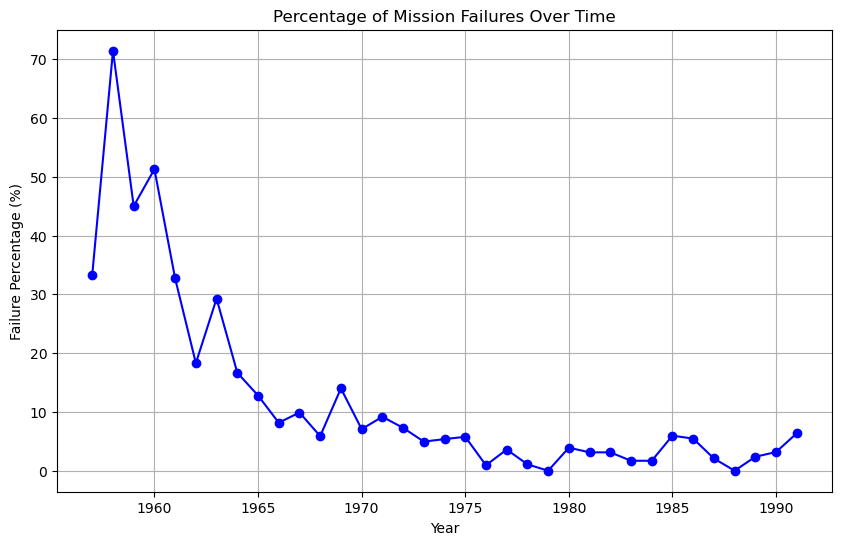

In [97]:
# ax1 = plt.gca()
# ax1.set_ylim(bottom=0, top=100)

# ax1.set_ylabel('Fail_percent', color='#F08F2E', fontsize=14)
# ax1.plot(yearly_data['year'], yearly_data['fail_percent'], 
#          color='skyblue', linewidth=3, marker='o')
# plt.show()
# or
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['fail_percent'], marker='o', linestyle='-', color='b')
plt.title('Percentage of Mission Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage (%)')
plt.grid(True)
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [98]:
lead_con_year = clean_data.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.sum})
lead_con_year['year'] = lead_con_year['Date'].dt.year

lead_con_year = lead_con_year.groupby(['year', 'country'], as_index=False).agg({'Mission_Status': pd.Series.count})
lead_con_year

lead_con_year = lead_con_year.loc[lead_con_year.groupby('year')['Mission_Status'].idxmax()]
lead_con_year

lead_con_year

bar = px.bar(lead_con_year,
               color = 'country',
              x='year',
               y='Mission_Status',
               color_continuous_scale='Viridis',
               title='Lead in terms of Total Number of Launches',
               )

bar.update_layout(xaxis_title='Month', 
                    yaxis_title='Lunch Number',
                    coloraxis_showscale=False)
bar.show()

In [99]:
lead_success_con_year = clean_data.groupby(['Date', 'country'], as_index=False).agg({'Mission_Status': pd.Series.sum})
lead_success_con_year['year'] = lead_success_con_year['Date'].dt.year
lead_success_con_year

lead_success_con_year['Success'] = lead_success_con_year.Mission_Status.apply(lambda x: 1 if x == 'Success' else 0)
lead_success_con_year = lead_success_con_year.groupby(['year', 'country'], as_index=False).agg({'Success': pd.Series.sum})
lead_success_con_year

lead_success_con_year = lead_success_con_year.loc[lead_success_con_year.groupby('year')['Success'].idxmax()]
lead_success_con_year

bar = px.bar(lead_success_con_year,
               color = 'country',
              x='year',
               y='Success',
               color_continuous_scale='Viridis',
               title='Lead in terms of Total Number of Successful Launches')

bar.update_layout(xaxis_title='Month', 
                    yaxis_title='Lunch Number',
                    coloraxis_showscale=False)
bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [100]:
year_on_year_org = clean_data.groupby(['Date', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.sum})
year_on_year_org['year'] = year_on_year_org['Date'].dt.year
year_on_year_org = year_on_year_org.groupby(['year', 'Organisation'], as_index=False).agg({'Mission_Status': pd.Series.count})
year_on_year_org

year_on_year_org_total = year_on_year_org.loc[year_on_year_org.groupby('year')['Mission_Status'].idxmax()]
year_on_year_org_total

,year,Organisation,Mission_Status
0,1957,RVSN USSR,2
6,1958,US Navy,12
10,1959,US Air Force,10
15,1960,US Air Force,21
19,1961,US Air Force,23
...,...,...,...
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27


In [101]:
decade_70s = year_on_year_org_total[year_on_year_org_total['year'] < 1980]
decade_70s = decade_70s[decade_70s['year'] >= 1971]
decade_70s

,year,Organisation,Mission_Status
93,1971,RVSN USSR,93
101,1972,RVSN USSR,79
108,1973,RVSN USSR,84
115,1974,RVSN USSR,83
125,1975,RVSN USSR,89
132,1976,RVSN USSR,95
139,1977,RVSN USSR,97
146,1978,RVSN USSR,71
153,1979,RVSN USSR,36


In [102]:
decade_80s = year_on_year_org_total[year_on_year_org_total['year'] < 1990]
decade_80s = decade_80s[decade_80s['year'] >= 1981]
decade_80s

,year,Organisation,Mission_Status
170,1981,RVSN USSR,51
178,1982,RVSN USSR,53
188,1983,RVSN USSR,46
198,1984,RVSN USSR,42
206,1985,RVSN USSR,51
213,1986,RVSN USSR,49
221,1987,RVSN USSR,42
232,1988,RVSN USSR,36
242,1989,RVSN USSR,26


In [103]:
year_on_year_org_total[-3:]

,year,Organisation,Mission_Status
616,2018,CASC,37
632,2019,CASC,27
649,2020,CASC,19


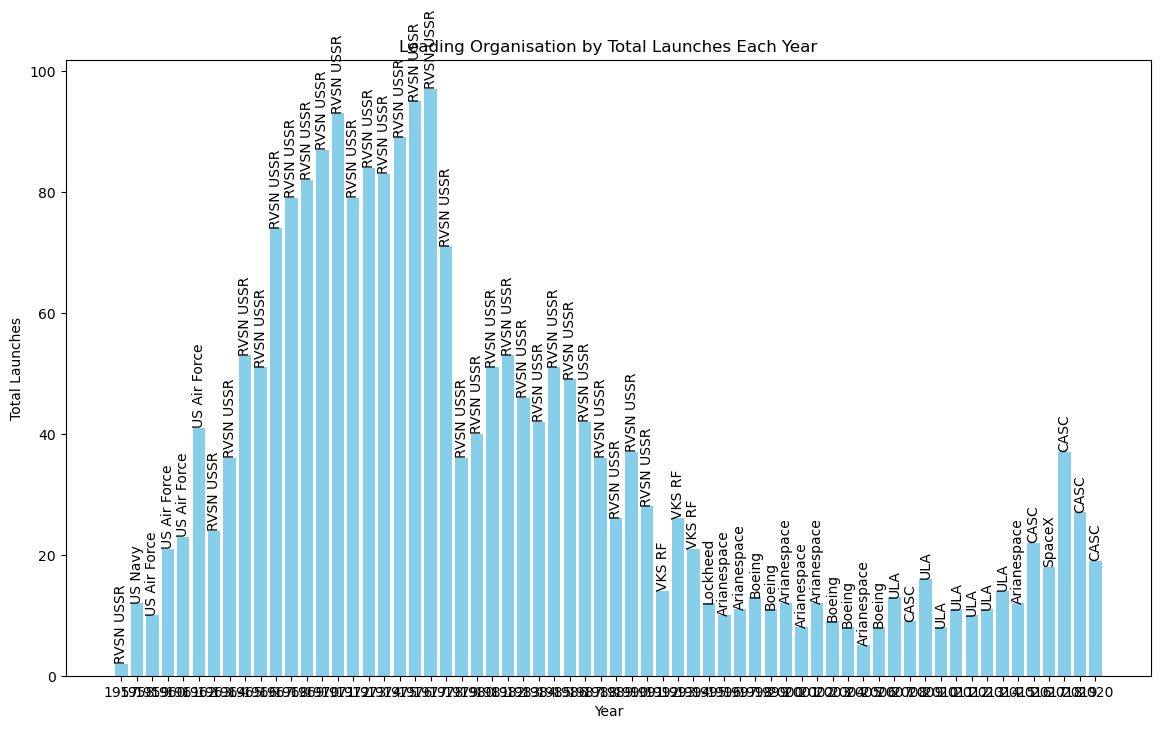

Dominant Organisations in the 1970s and 1980s:
    Year Organisation
13  1970    RVSN USSR
14  1971    RVSN USSR
15  1972    RVSN USSR
16  1973    RVSN USSR
17  1974    RVSN USSR
18  1975    RVSN USSR
19  1976    RVSN USSR
20  1977    RVSN USSR
21  1978    RVSN USSR
22  1979    RVSN USSR
23  1980    RVSN USSR
24  1981    RVSN USSR
25  1982    RVSN USSR
26  1983    RVSN USSR
27  1984    RVSN USSR
28  1985    RVSN USSR
29  1986    RVSN USSR
30  1987    RVSN USSR
31  1988    RVSN USSR
32  1989    RVSN USSR
Dominant Organisations in 2018, 2019, and 2020:
    Year Organisation
61  2018         CASC
62  2019         CASC
63  2020         CASC


In [104]:
# Example: Load your data into a DataFrame
# df = pd.read_csv('your_file.csv')

# Ensure 'Date' column is in datetime format
df = clean_data

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Filter the data to include only years up to and including 2020
df = df[df['Year'] <= 2020]

# Group by year and organisation and count the number of launches
launches_per_organisation_year = df.groupby(['Year', 'Organisation']).size().reset_index(name='Total_Launches')

# Define a function to find the organisation with the maximum launches
def find_leading_organisation(group):
    return group.loc[group['Total_Launches'].idxmax()]

# Apply the function to each year
leading_organisation_each_year = launches_per_organisation_year.groupby('Year').apply(find_leading_organisation).reset_index(drop=True)

# Visualize the data
plt.figure(figsize=(14, 8))
bars = plt.bar(leading_organisation_each_year['Year'], leading_organisation_each_year['Total_Launches'], color='skyblue')

# Add labels on top of the bars
for bar, org in zip(bars, leading_organisation_each_year['Organisation']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), org, ha='center', va='bottom', fontsize=10, rotation=90)

plt.xlabel('Year')
plt.ylabel('Total Launches')
plt.title('Leading Organisation by Total Launches Each Year')
plt.xticks(leading_organisation_each_year['Year'])
plt.show()

# Analyze dominant organisations in the 1970s and 1980s
dominant_70s_80s = leading_organisation_each_year[(leading_organisation_each_year['Year'] >= 1970) & (leading_organisation_each_year['Year'] < 1990)]
print("Dominant Organisations in the 1970s and 1980s:")
print(dominant_70s_80s[['Year', 'Organisation']])

# Analyze dominant organisations in 2018, 2019, and 2020
dominant_2018_2020 = leading_organisation_each_year[leading_organisation_each_year['Year'].isin([2018, 2019, 2020])]
print("Dominant Organisations in 2018, 2019, and 2020:")
print(dominant_2018_2020[['Year', 'Organisation']])